In [88]:
import boto3

In [89]:
import pandas as pd
from io import StringIO

In [90]:
# Set up S3 client
client = boto3.client('s3')

In [91]:
bucket_name = 'viamericas-datalake-dev-us-east-1-283731589572-analytics'
path = 'Forecast/Forecast_analysis/forecast_7d_25_11_2022/' # Folder under analysis

In [92]:
# Listing objects 
elements = client.list_objects(Bucket=bucket_name, Prefix=path)

In [93]:
# Initialize an empty list 
dfs = []

In [94]:
# Iterate through each CSV in the S3 path
for obj in elements.get('Contents', []):
#    print(obj)
    # Check if the object is a CSV file
    if obj['Key'].endswith('.csv'):
        # Read CSV content from S3
        response = client.get_object(Bucket=bucket_name, Key=obj['Key'])
        print(obj['Key'])
        csv_content = response['Body'].read().decode('utf-8')

        # Transform CSV content to df
        df = pd.read_csv(StringIO(csv_content))

        dfs.append(df)

Forecast/Forecast_analysis/forecast_7d_25_11_2022/forecast_7d_25_11_2022_2024-01-16T14-11-37Z_part0.csv
Forecast/Forecast_analysis/forecast_7d_25_11_2022/forecast_7d_25_11_2022_2024-01-16T14-11-37Z_part1.csv
Forecast/Forecast_analysis/forecast_7d_25_11_2022/forecast_7d_25_11_2022_2024-01-16T14-11-37Z_part10.csv
Forecast/Forecast_analysis/forecast_7d_25_11_2022/forecast_7d_25_11_2022_2024-01-16T14-11-37Z_part11.csv
Forecast/Forecast_analysis/forecast_7d_25_11_2022/forecast_7d_25_11_2022_2024-01-16T14-11-37Z_part12.csv
Forecast/Forecast_analysis/forecast_7d_25_11_2022/forecast_7d_25_11_2022_2024-01-16T14-11-37Z_part13.csv
Forecast/Forecast_analysis/forecast_7d_25_11_2022/forecast_7d_25_11_2022_2024-01-16T14-11-37Z_part14.csv
Forecast/Forecast_analysis/forecast_7d_25_11_2022/forecast_7d_25_11_2022_2024-01-16T14-11-37Z_part15.csv
Forecast/Forecast_analysis/forecast_7d_25_11_2022/forecast_7d_25_11_2022_2024-01-16T14-11-37Z_part16.csv
Forecast/Forecast_analysis/forecast_7d_25_11_2022/forecas

In [95]:
final_df = pd.concat(dfs, ignore_index=True)

/tmp/ipykernel_899/3658546852.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat(dfs, ignore_index=True)


In [96]:
final_df['date'] = pd.to_datetime(final_df['date']).dt.date

In [97]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   item_id  735 non-null    object 
 1   country  735 non-null    object 
 2   payer    735 non-null    object 
 3   date     735 non-null    object 
 4   p10      735 non-null    float64
 5   p50      735 non-null    float64
 6   p90      735 non-null    float64
 7   mean     735 non-null    float64
dtypes: float64(4), object(4)
memory usage: 46.1+ KB


In [98]:
final_df['item_id'].nunique()

105

In [99]:
final_df.payer.unique()

array(['ecuagiros', 'transferto - thunes', 'banco ganadero (bolivia)',
       'zeepay', 'yes bank', 'elektra (bts)', 'argenper', 'merchantrade',
       'teledolar', 'banco daycoval',
       'banco industrial els (red chapina)', 'unitransfer', 'afex',
       'banco bhd leon', 'banco industrial', 'banorte (ut)',
       'banco del austro', 'interbank', 'nairagram', 'intermex',
       'banco bisa', 'easy pagos', 'banpro', 'airpak', 'bantrab (ut)',
       'caribe express', 'chedraui (appriza)', 'ficohsa',
       'credomatic (bts)', 'speed money', 'abank (tn)', 'metrobank',
       'oxxo (tn)', 'vtn', 'lafise', 'global envios',
       'cusca (citi - reciba networks)', 'fedecaces (el salvador)',
       'cebuana lhuillier', 'davivienda - honduras (bts)',
       'waldos (appriza)', 'fedecredito (ryt)', 'davivienda',
       'walmart (ut)', 'viamericas usa deposits', 'msbb money',
       'bancolombia', 'banrural (honduras)', 'grupo exito (tn)',
       'promerica', 'banco de oro (bdo)', 'banhcafe',

In [100]:
final_df.head()

,item_id,country,payer,date,p10,p50,p90,mean
0,49,ecuador,ecuagiros,2022-11-26,50958.597670,67212.591148,82264.952416,67214.477090
1,49,ecuador,ecuagiros,2022-11-27,52365.220615,66640.966796,83326.088126,66882.286091
2,49,ecuador,ecuagiros,2022-11-28,68499.314266,88874.868253,109519.095514,89117.915050
3,49,ecuador,ecuagiros,2022-11-29,55936.016082,72018.636177,89362.446383,72211.385916
4,49,ecuador,ecuagiros,2022-11-30,47200.466419,63397.560571,78581.725760,63425.670470


In [101]:
final_df.country.unique()

array(['ecuador', 'spain', 'bolivia', "cote d'ivoire (ivory coast)",
       'india', 'honduras', 'peru', 'thailand', 'costa rica', 'brazil',
       'el salvador', 'portugal', 'haiti', 'chile', 'guatemala',
       'cameroon', 'dominican republic', 'mexico', 'bangladesh',
       'nigeria', 'indonesia', 'nicaragua', 'ghana', 'philippines',
       'malaysia', 'colombia', 'united states (atm & deposits)',
       'argentina', 'gambia, the', 'guinea', 'togo', 'united states',
       'senegal', 'sierra leone', 'uruguay'], dtype=object)

In [102]:
# Grouping by 'payer' and 'country' concatenated for this level of granularity
final_df['payer_country'] = final_df['payer'] + '_' + final_df['country']

In [103]:
final_df['payer_country'].nunique()

105

In [104]:
final_df.country.nunique()

35

In [105]:
final_df['date'] = pd.to_datetime(final_df['date'])

In [106]:
##TOP 10 FORECAST AMOUNTS BETWEEN 26/11/2022 AND 02/12/2022##
total_amount_per_payer =final_df.groupby('payer_country')['mean'].sum()
top_10_payers = total_amount_per_payer.sort_values(ascending=False).head(10)
print(top_10_payers)

payer_country
elektra (mexico)_mexico                 5.075136e+07
bancoppel (appriza)_mexico              2.962872e+07
banrural (ryt)_guatemala                2.262995e+07
banco industrial_guatemala              1.802591e+07
envios con clabe (appriza)_mexico       5.121230e+06
bbva - bancomer (bts)_mexico            4.816712e+06
banco de occidente_honduras             3.783121e+06
msbb money_brazil                       3.332506e+06
banorte (ut)_mexico                     3.321781e+06
telecomm telegrafos (appriza)_mexico    3.173235e+06
Name: mean, dtype: float64


In [107]:
##TIME INTERVAL FORECAST##
final_df.date.min(),final_df.date.max(),

(Timestamp('2022-11-26 00:00:00'), Timestamp('2022-12-02 00:00:00'))

In [108]:
final_df['mean'].sum()

191187100.02510595

In [109]:
control=final_df.loc[final_df.country=='mexico']

In [110]:
control['mean'].sum()

105924688.7412545

In [111]:
pip install pyathena


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [112]:
from pyathena import connect

In [113]:
# DB Setting
bucket_name = 's3://viamericas-datalake-dev-us-east-1-283731589572-athena/'
origin_name = 'AwsDataCatalog'
database_name= 'analytics'
table_name = 'daily_check'

In [114]:
#Connection
conn = connect(s3_staging_dir=f'{bucket_name}queryresults/',
               region_name='us-east-1')
df_check = pd.read_sql(f'SELECT * FROM {origin_name}.{database_name}.{table_name};', conn)

/tmp/ipykernel_899/3276710735.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_check = pd.read_sql(f'SELECT * FROM {origin_name}.{database_name}.{table_name};', conn)


In [115]:
df_check['date'] = pd.to_datetime(df_check['date'])

In [116]:
df_check=df_check.loc[(df_check.date>'2022-11-25') & (df_check.date<'2022-12-03')]

In [118]:
df_check.date.min(),df_check.date.max()

(Timestamp('2022-11-26 00:00:00'), Timestamp('2022-12-02 00:00:00'))

In [119]:
df_check.head()

,payer,country,date,tx,amount,coupon_count
348,CHEDRAUI (APPRIZA),MEXICO,2022-11-29,16,4927.03,2
357,BANPAIS (RED CHAPINA),HONDURAS,2022-12-01,61,36475.00,0
412,PROMERICA,EL SALVADOR,2022-11-28,94,48558.75,0
519,EXPIRED ORDERS,NICARAGUA,2022-11-26,0,0.00,0
974,AFRO INTERNACIONAL,SIERRA LEONE,2022-11-27,10,2096.08,0


In [120]:
df_check.country.nunique()

42

In [121]:
df_check.payer.nunique()

92

In [122]:
df_check.amount.sum()

178078182.8456

In [123]:
control2=df_check.loc[df_check.country=='MEXICO']

In [124]:
control2.amount.sum()

99429091.1738

In [125]:
df_check.country.unique()

array(['MEXICO', 'HONDURAS', 'EL SALVADOR', 'NICARAGUA', 'SIERRA LEONE',
       'BRAZIL', 'GHANA', 'INDONESIA', 'CAMEROON', 'BANGLADESH',
       'UNITED STATES (ATM & DEPOSITS)', 'ECUADOR', 'PORTUGAL', 'NIGERIA',
       'GUATEMALA', 'BENIN', 'UNITED STATES', 'SENEGAL', 'PHILIPPINES',
       'BOLIVIA', 'NEPAL', 'MALAYSIA', 'GUINEA', 'URUGUAY',
       'DOMINICAN REPUBLIC', 'BURKINA FASO', 'CHILE',
       "COTE D'IVOIRE (IVORY COAST)", 'SPAIN', 'ARGENTINA', 'INDIA',
       'GAMBIA, THE', 'COLOMBIA', 'COSTA RICA', 'HAITI', 'ZAMBIA', 'PERU',
       'TOGO', 'THAILAND', 'BELGIUM', 'SWITZERLAND', 'MALI'], dtype=object)

In [126]:
# Grouping by 'payer' and 'country' concatenated for this level of granularity
df_check['payer_country'] = df_check['payer'] + '_' + df_check['country']

In [127]:
##TOP 10 DAILY_CHECK AMOUNTS BETWEEN 21/03/2023 AND 28/03/2023##
total_amount_per_payer2 =df_check.groupby('payer_country')['amount'].sum()
top_10_payers2 = total_amount_per_payer2.sort_values(ascending=False).head(10)
print(top_10_payers2)

payer_country
ELEKTRA (MEXICO)_MEXICO                 4.747392e+07
BANCOPPEL (APPRIZA)_MEXICO              2.739943e+07
BANRURAL (RYT)_GUATEMALA                1.970963e+07
BANCO INDUSTRIAL_GUATEMALA              1.632533e+07
ENVIOS CON CLABE (APPRIZA)_MEXICO       4.984820e+06
BBVA - BANCOMER (BTS)_MEXICO            4.709623e+06
MSBB MONEY_BRAZIL                       3.420135e+06
BANORTE (UT)_MEXICO                     3.218709e+06
TELECOMM TELEGRAFOS (APPRIZA)_MEXICO    3.097060e+06
BANCO DE OCCIDENTE_HONDURAS             2.973291e+06
Name: amount, dtype: float64


In [128]:
final_df.country.unique()

array(['ecuador', 'spain', 'bolivia', "cote d'ivoire (ivory coast)",
       'india', 'honduras', 'peru', 'thailand', 'costa rica', 'brazil',
       'el salvador', 'portugal', 'haiti', 'chile', 'guatemala',
       'cameroon', 'dominican republic', 'mexico', 'bangladesh',
       'nigeria', 'indonesia', 'nicaragua', 'ghana', 'philippines',
       'malaysia', 'colombia', 'united states (atm & deposits)',
       'argentina', 'gambia, the', 'guinea', 'togo', 'united states',
       'senegal', 'sierra leone', 'uruguay'], dtype=object)

In [129]:
final_df = final_df.applymap(lambda x: x.upper() if isinstance(x, str) else x)

/tmp/ipykernel_899/2399063668.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  final_df = final_df.applymap(lambda x: x.upper() if isinstance(x, str) else x)


In [130]:
final_df.country.unique()

array(['ECUADOR', 'SPAIN', 'BOLIVIA', "COTE D'IVOIRE (IVORY COAST)",
       'INDIA', 'HONDURAS', 'PERU', 'THAILAND', 'COSTA RICA', 'BRAZIL',
       'EL SALVADOR', 'PORTUGAL', 'HAITI', 'CHILE', 'GUATEMALA',
       'CAMEROON', 'DOMINICAN REPUBLIC', 'MEXICO', 'BANGLADESH',
       'NIGERIA', 'INDONESIA', 'NICARAGUA', 'GHANA', 'PHILIPPINES',
       'MALAYSIA', 'COLOMBIA', 'UNITED STATES (ATM & DEPOSITS)',
       'ARGENTINA', 'GAMBIA, THE', 'GUINEA', 'TOGO', 'UNITED STATES',
       'SENEGAL', 'SIERRA LEONE', 'URUGUAY'], dtype=object)

In [131]:
df_forecast = pd.merge(df_check, final_df, on=['date','payer','country'], how='outer', indicator=True)

In [132]:
df_forecast._merge.value_counts()

_merge
both          661
left_only      83
right_only     74
Name: count, dtype: int64

In [133]:
control3=df_forecast.loc[df_forecast._merge=='left_only']
control3.payer.unique()

array(['EXPIRED ORDERS', 'TRANSPAY', 'GME', 'AFEX', 'KORI', 'NAFA',
       '7 ELEVEN (UT)', 'TRANSFERTO - THUNES', 'TELEDOLAR-NIC',
       'BDO - UNIVERSAL CASH PICKUP'], dtype=object)

In [134]:
control4=df_forecast.loc[df_forecast._merge=='right_only']
control4.payer.unique()

array(['ZEEPAY', 'YES BANK', 'MERCHANTRADE',
       'BANCO INDUSTRIAL ELS (RED CHAPINA)', 'TRANSFERTO - THUNES', 'VTN',
       'ARGENPER', 'NAFA', 'TRANSPAY', 'AFRO INTERNACIONAL',
       'M. LHUILLIER', 'TIGO MONEY', 'BBVA URUGUAY (BTS)'], dtype=object)

In [135]:
##ESTO SE NOS ESTARÍAMOS PERDIENDO EN 200 MILLONES (0.25%), ENCONTRAR DIFERENCIAS LUEGO, POR AHORA AVANZAR EN MAPES##
## CUIDADO QUE PUEDE SUCEDER TAMBIEN QUE LOS PAYERS PEQUEÑOS, NO OPEREN AGÚN DIA Y ESO EXPLIQUE QUE NO HAYA MERGE PERFECTO##
control4['mean'].sum()

11997.812359050204

In [136]:
control4.country.unique()

array(["COTE D'IVOIRE (IVORY COAST)", 'INDIA', 'THAILAND', 'EL SALVADOR',
       'PORTUGAL', 'CAMEROON', 'BANGLADESH', 'MALAYSIA', 'NIGERIA',
       'ARGENTINA', 'GUINEA', 'TOGO', 'SENEGAL', 'PHILIPPINES', 'URUGUAY'],
      dtype=object)

In [137]:
control5=df_forecast.loc[df_forecast._merge=='both']
control5.payer.unique()

array(['CHEDRAUI (APPRIZA)', 'BANPAIS (RED CHAPINA)', 'PROMERICA',
       'AFRO INTERNACIONAL', 'BANCO DAYCOVAL', 'TRANSFER DIRECTO',
       'ZEEPAY', 'MERCHANTRADE', 'MASTERCARD ATM NETWORK',
       'TRANSFERTO - THUNES', 'EMPENOS DEL SUR (ANTERIOR BALSAS)',
       'ABANK (TN)', 'CEBUANA LHUILLIER', 'NAIRAGRAM',
       'BANCO DE ORO (BDO)', 'NAFA', 'COOPERATIVA CACIL (UT)',
       'BANCO BISA', 'BANTRAB (UT)', 'BANCO BHD LEON',
       'VIAMERICAS USA DEPOSITS', 'ARGENPER', 'YES BANK', 'LAFISE',
       'BANORTE (UT)', 'FEDECACES (EL SALVADOR)', 'FEDECREDITO (RYT)',
       'DAVIVIENDA', 'BBVA - BANCOMER (BTS)', 'ECUAGIROS',
       'BAM - BANCO AGROMERCANTIL (UT)', 'CARIBE EXPRESS', 'CREDOMATIC',
       'BANCOPPEL (APPRIZA)', 'CUSCA (CITI - RECIBA NETWORKS)',
       'BANCO AGRICOLA', 'WALDOS (APPRIZA)',
       'MICOOPE-FENACOAC (RED CHAPINA)', 'BANCO ATLANTIDA',
       'BANRURAL (RYT)', 'COOPERATIVA FRONTERIZA (UT)', 'MSBB MONEY',
       'GLOBAL ENVIOS', 'BANPRO', 'ELEKTRA (MEXICO)', 'AI

In [138]:
#7% DIF A UNA SEMANA##
control5.amount.sum(), control5['mean'].sum()

(178057565.0256, 191175102.2127469)

In [139]:
df_forecast.amount.sum()

178078182.8456

In [140]:
##BANCO POPULAR HONDURAS (UT)en df_check#
control6= df_check.loc[df_check.payer=='BANCO POPULAR HONDURAS (UT)']
control6.head(7)

,payer,country,date,tx,amount,coupon_count,payer_country
14928,BANCO POPULAR HONDURAS (UT),HONDURAS,2022-11-26,2,330.0,0,BANCO POPULAR HONDURAS (UT)_HONDURAS
62113,BANCO POPULAR HONDURAS (UT),HONDURAS,2022-11-28,2,654.0,0,BANCO POPULAR HONDURAS (UT)_HONDURAS
63905,BANCO POPULAR HONDURAS (UT),HONDURAS,2022-11-29,2,510.0,0,BANCO POPULAR HONDURAS (UT)_HONDURAS
67113,BANCO POPULAR HONDURAS (UT),HONDURAS,2022-11-30,3,1222.0,0,BANCO POPULAR HONDURAS (UT)_HONDURAS
67470,BANCO POPULAR HONDURAS (UT),HONDURAS,2022-11-27,5,1210.0,0,BANCO POPULAR HONDURAS (UT)_HONDURAS
97281,BANCO POPULAR HONDURAS (UT),HONDURAS,2022-12-01,3,5800.0,0,BANCO POPULAR HONDURAS (UT)_HONDURAS
100171,BANCO POPULAR HONDURAS (UT),HONDURAS,2022-12-02,1,200.0,0,BANCO POPULAR HONDURAS (UT)_HONDURAS


In [141]:
##BANCO POPULAR HONDURAS (UT)en df_forecast#
control7= df_forecast.loc[df_forecast.payer=='BANCO POPULAR HONDURAS (UT)']
control7.head(7)

,payer,country,date,tx,amount,coupon_count,payer_country_x,item_id,p10,p50,p90,mean,payer_country_y,_merge
104,BANCO POPULAR HONDURAS (UT),HONDURAS,2022-11-26,2.0,330.0,0.0,BANCO POPULAR HONDURAS (UT)_HONDURAS,23.0,614.795132,1609.142225,2784.557439,1584.784327,BANCO POPULAR HONDURAS (UT)_HONDURAS,both
421,BANCO POPULAR HONDURAS (UT),HONDURAS,2022-11-28,2.0,654.0,0.0,BANCO POPULAR HONDURAS (UT)_HONDURAS,23.0,675.613871,1695.399277,2914.133595,1717.141531,BANCO POPULAR HONDURAS (UT)_HONDURAS,both
433,BANCO POPULAR HONDURAS (UT),HONDURAS,2022-11-29,2.0,510.0,0.0,BANCO POPULAR HONDURAS (UT)_HONDURAS,23.0,566.456702,1654.499154,2836.972198,1632.646587,BANCO POPULAR HONDURAS (UT)_HONDURAS,both
467,BANCO POPULAR HONDURAS (UT),HONDURAS,2022-11-30,3.0,1222.0,0.0,BANCO POPULAR HONDURAS (UT)_HONDURAS,23.0,261.730074,1282.126835,2263.556423,1242.188900,BANCO POPULAR HONDURAS (UT)_HONDURAS,both
471,BANCO POPULAR HONDURAS (UT),HONDURAS,2022-11-27,5.0,1210.0,0.0,BANCO POPULAR HONDURAS (UT)_HONDURAS,23.0,928.217869,2072.308568,3259.309303,2034.615294,BANCO POPULAR HONDURAS (UT)_HONDURAS,both
695,BANCO POPULAR HONDURAS (UT),HONDURAS,2022-12-01,3.0,5800.0,0.0,BANCO POPULAR HONDURAS (UT)_HONDURAS,23.0,153.841161,1103.771085,2032.923690,1099.165049,BANCO POPULAR HONDURAS (UT)_HONDURAS,both
731,BANCO POPULAR HONDURAS (UT),HONDURAS,2022-12-02,1.0,200.0,0.0,BANCO POPULAR HONDURAS (UT)_HONDURAS,23.0,544.764782,1593.709140,2623.133709,1558.250556,BANCO POPULAR HONDURAS (UT)_HONDURAS,both


In [75]:
##LA DIFERENCIAS SE EXPLICAN PORQUE LOS PAYERS PEQUEÑOS NO OPERAN TODOS LOS DIAS Y FORECAST LANZA UN PRONOSTICO A 7D (IMPUTAR ESOS DIAS)

In [142]:
df_forecast=df_forecast.loc[df_forecast._merge!='left_only']

In [143]:
df_forecast.amount.fillna(0, inplace=True)
df_forecast.info()

<class 'pandas.core.frame.DataFrame'>
Index: 735 entries, 0 to 817
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   payer            735 non-null    object        
 1   country          735 non-null    object        
 2   date             735 non-null    datetime64[ns]
 3   tx               661 non-null    float64       
 4   amount           735 non-null    float64       
 5   coupon_count     661 non-null    float64       
 6   payer_country_x  661 non-null    object        
 7   item_id          735 non-null    float64       
 8   p10              735 non-null    float64       
 9   p50              735 non-null    float64       
 10  p90              735 non-null    float64       
 11  mean             735 non-null    float64       
 12  payer_country_y  735 non-null    object        
 13  _merge           735 non-null    category      
dtypes: category(1), datetime64[ns](1), float64(8), 

In [144]:
df_forecast_final=df_forecast.loc[:, ['payer','country','date','amount','p10','p50','p90','mean']]

In [145]:
df_forecast_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 735 entries, 0 to 817
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   payer    735 non-null    object        
 1   country  735 non-null    object        
 2   date     735 non-null    datetime64[ns]
 3   amount   735 non-null    float64       
 4   p10      735 non-null    float64       
 5   p50      735 non-null    float64       
 6   p90      735 non-null    float64       
 7   mean     735 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 51.7+ KB


In [146]:
# Grouping by 'payer' and 'country' concatenated for this level of granularity
df_forecast_final['payer_country'] = df_forecast_final['payer'] + '_' + df_forecast_final['country']

In [81]:
df_forecast_final.head()

,payer,country,date,amount,p10,p50,p90,mean,payer_country
0,ECUAGIROS,ECUADOR,2022-11-26,0.0,50958.597670,67212.591148,82264.952416,67214.477090,ECUAGIROS_ECUADOR
1,ECUAGIROS,ECUADOR,2022-11-27,0.0,52365.220615,66640.966796,83326.088126,66882.286091,ECUAGIROS_ECUADOR
2,ECUAGIROS,ECUADOR,2022-11-28,0.0,68499.314266,88874.868253,109519.095514,89117.915050,ECUAGIROS_ECUADOR
3,ECUAGIROS,ECUADOR,2022-11-29,0.0,55936.016082,72018.636177,89362.446383,72211.385916,ECUAGIROS_ECUADOR
4,ECUAGIROS,ECUADOR,2022-11-30,0.0,47200.466419,63397.560571,78581.725760,63425.670470,ECUAGIROS_ECUADOR


In [82]:
## MAPE A 1 DÍA POR PAYER##

In [83]:
##GENERAMOS EL ERROR DE PRONOSTICO##
##ELIMINAMOS LOS CASOS CON AMOUNT==0 PORQUE GENERA UNA INDETERMINACIÓN EN EL CÁLCULO (A/0=INF)
## Y SI IMPUTAMOS 1 EN VEZ DE CERO???###

In [84]:
## POR LO PRONTO ELIMINO LOS QUE TIENEN AMOUNT CERO Y EL MAPE ESTARÁ DEFINIDO BAJO ESA CONDICION##

In [147]:
df_forecast_final=df_forecast_final.loc[df_forecast_final.amount!=0]
df_forecast_final.shape

(653, 9)

In [148]:
df_forecast_final.head()

,payer,country,date,amount,p10,p50,p90,mean,payer_country
0,CHEDRAUI (APPRIZA),MEXICO,2022-11-29,4927.03,2195.781797,4691.942930,7446.870256,4715.019791,CHEDRAUI (APPRIZA)_MEXICO
1,BANPAIS (RED CHAPINA),HONDURAS,2022-12-01,36475.00,27507.091529,38872.493070,50244.219076,38856.110110,BANPAIS (RED CHAPINA)_HONDURAS
2,PROMERICA,EL SALVADOR,2022-11-28,48558.75,36319.420631,46477.433580,58580.648102,47064.782629,PROMERICA_EL SALVADOR
4,AFRO INTERNACIONAL,SIERRA LEONE,2022-11-27,2096.08,3692.494776,6396.670548,9865.464510,6404.673123,AFRO INTERNACIONAL_SIERRA LEONE
5,BANCO DAYCOVAL,BRAZIL,2022-12-02,8382.86,-20293.011672,7061.634217,34090.321482,7202.239675,BANCO DAYCOVAL_BRAZIL


In [149]:
control=df_forecast_final.loc[df_forecast_final.country=='MEXICO']
control

,payer,country,date,amount,p10,p50,p90,mean,payer_country
0,CHEDRAUI (APPRIZA),MEXICO,2022-11-29,4927.03,2.195782e+03,4.691943e+03,7.446870e+03,4.715020e+03,CHEDRAUI (APPRIZA)_MEXICO
6,TRANSFER DIRECTO,MEXICO,2022-11-26,13322.00,1.067498e+04,1.328492e+04,1.620326e+04,1.333076e+04,TRANSFER DIRECTO_MEXICO
16,EMPENOS DEL SUR (ANTERIOR BALSAS),MEXICO,2022-11-30,13550.00,1.467922e+04,2.042584e+04,2.637789e+04,2.031922e+04,EMPENOS DEL SUR (ANTERIOR BALSAS)_MEXICO
58,CHEDRAUI (APPRIZA),MEXICO,2022-11-28,8775.68,2.878655e+03,5.472389e+03,8.340567e+03,5.509428e+03,CHEDRAUI (APPRIZA)_MEXICO
64,BANORTE (UT),MEXICO,2022-11-27,549112.55,5.186954e+05,6.189916e+05,7.177106e+05,6.201799e+05,BANORTE (UT)_MEXICO
...,...,...,...,...,...,...,...,...,...
716,BBVA - BANCOMER (BTS),MEXICO,2022-11-26,620349.93,6.865482e+05,7.987012e+05,8.960491e+05,7.986206e+05,BBVA - BANCOMER (BTS)_MEXICO
724,WALMART (UT),MEXICO,2022-11-29,198348.99,1.760390e+05,2.057130e+05,2.398377e+05,2.062362e+05,WALMART (UT)_MEXICO
733,BANCOPPEL (APPRIZA),MEXICO,2022-11-28,3768704.82,3.488758e+06,4.062770e+06,4.661427e+06,4.064734e+06,BANCOPPEL (APPRIZA)_MEXICO
737,ENVIOS CON CLABE (APPRIZA),MEXICO,2022-12-01,662693.13,5.261642e+05,6.108597e+05,6.956929e+05,6.100432e+05,ENVIOS CON CLABE (APPRIZA)_MEXICO


In [150]:
###MAPE FORECAST A 1 DÍA##
forecast_1d=df_forecast_final.loc[df_forecast_final.date=='2022-11-26']

In [152]:
forecast_1d.shape

(91, 9)

In [153]:
forecast_1d["pe"] = abs((forecast_1d.amount - forecast_1d['mean']) / forecast_1d.amount)

/tmp/ipykernel_899/2323064100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_1d["pe"] = abs((forecast_1d.amount - forecast_1d['mean']) / forecast_1d.amount)


In [154]:
forecast_1d.pe.min(), forecast_1d.pe.max()

(0.0006578508138090057, 4.338289332547137)

In [155]:
forecast_1d.head(2)

,payer,country,date,amount,p10,p50,p90,mean,payer_country,pe
6,TRANSFER DIRECTO,MEXICO,2022-11-26,13322.0,10674.984686,13284.919929,16203.259343,13330.763889,TRANSFER DIRECTO_MEXICO,0.000658
25,CEBUANA LHUILLIER,PHILIPPINES,2022-11-26,2108.3,511.215965,1976.754713,3361.802252,1937.201465,CEBUANA LHUILLIER_PHILIPPINES,0.081155


In [156]:
forecast_1d.sort_values('amount', ascending=False).head(10)

,payer,country,date,amount,p10,p50,p90,mean,payer_country,pe
582,ELEKTRA (MEXICO),MEXICO,2022-11-26,8178210.95,8.250253e+06,9.420317e+06,1.037329e+07,9.401130e+06,ELEKTRA (MEXICO)_MEXICO,0.149534
101,BANCOPPEL (APPRIZA),MEXICO,2022-11-26,4701768.00,4.946270e+06,5.592504e+06,6.119088e+06,5.589479e+06,BANCOPPEL (APPRIZA)_MEXICO,0.188804
687,BANRURAL (RYT),GUATEMALA,2022-11-26,3390630.21,3.624764e+06,4.135429e+06,4.593710e+06,4.135429e+06,BANRURAL (RYT)_GUATEMALA,0.219664
197,BANCO INDUSTRIAL,GUATEMALA,2022-11-26,2954785.67,2.730129e+06,3.110228e+06,3.435294e+06,3.101904e+06,BANCO INDUSTRIAL_GUATEMALA,0.049790
681,ENVIOS CON CLABE (APPRIZA),MEXICO,2022-11-26,791257.09,7.653972e+05,8.767503e+05,9.719650e+05,8.746957e+05,ENVIOS CON CLABE (APPRIZA)_MEXICO,0.105451
716,BBVA - BANCOMER (BTS),MEXICO,2022-11-26,620349.93,6.865482e+05,7.987012e+05,8.960491e+05,7.986206e+05,BBVA - BANCOMER (BTS)_MEXICO,0.287371
281,MSBB MONEY,BRAZIL,2022-11-26,496023.22,3.735678e+05,4.796237e+05,5.747922e+05,4.766128e+05,MSBB MONEY_BRAZIL,0.039132
282,BANCO DE OCCIDENTE,HONDURAS,2022-11-26,482333.54,4.986186e+05,5.811148e+05,6.594814e+05,5.793870e+05,BANCO DE OCCIDENTE_HONDURAS,0.201216
417,BANORTE (UT),MEXICO,2022-11-26,418674.10,4.258013e+05,5.122048e+05,5.940209e+05,5.088823e+05,BANORTE (UT)_MEXICO,0.215462
429,ELEKTRA (BTS),HONDURAS,2022-11-26,412432.84,4.213351e+05,4.931639e+05,5.531696e+05,4.932069e+05,ELEKTRA (BTS)_HONDURAS,0.195848


In [157]:
##MAPE PROMEDIO A 1 D (para los que tienen MAPE definido)
forecast_1d.pe.mean()

0.463018264307441

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


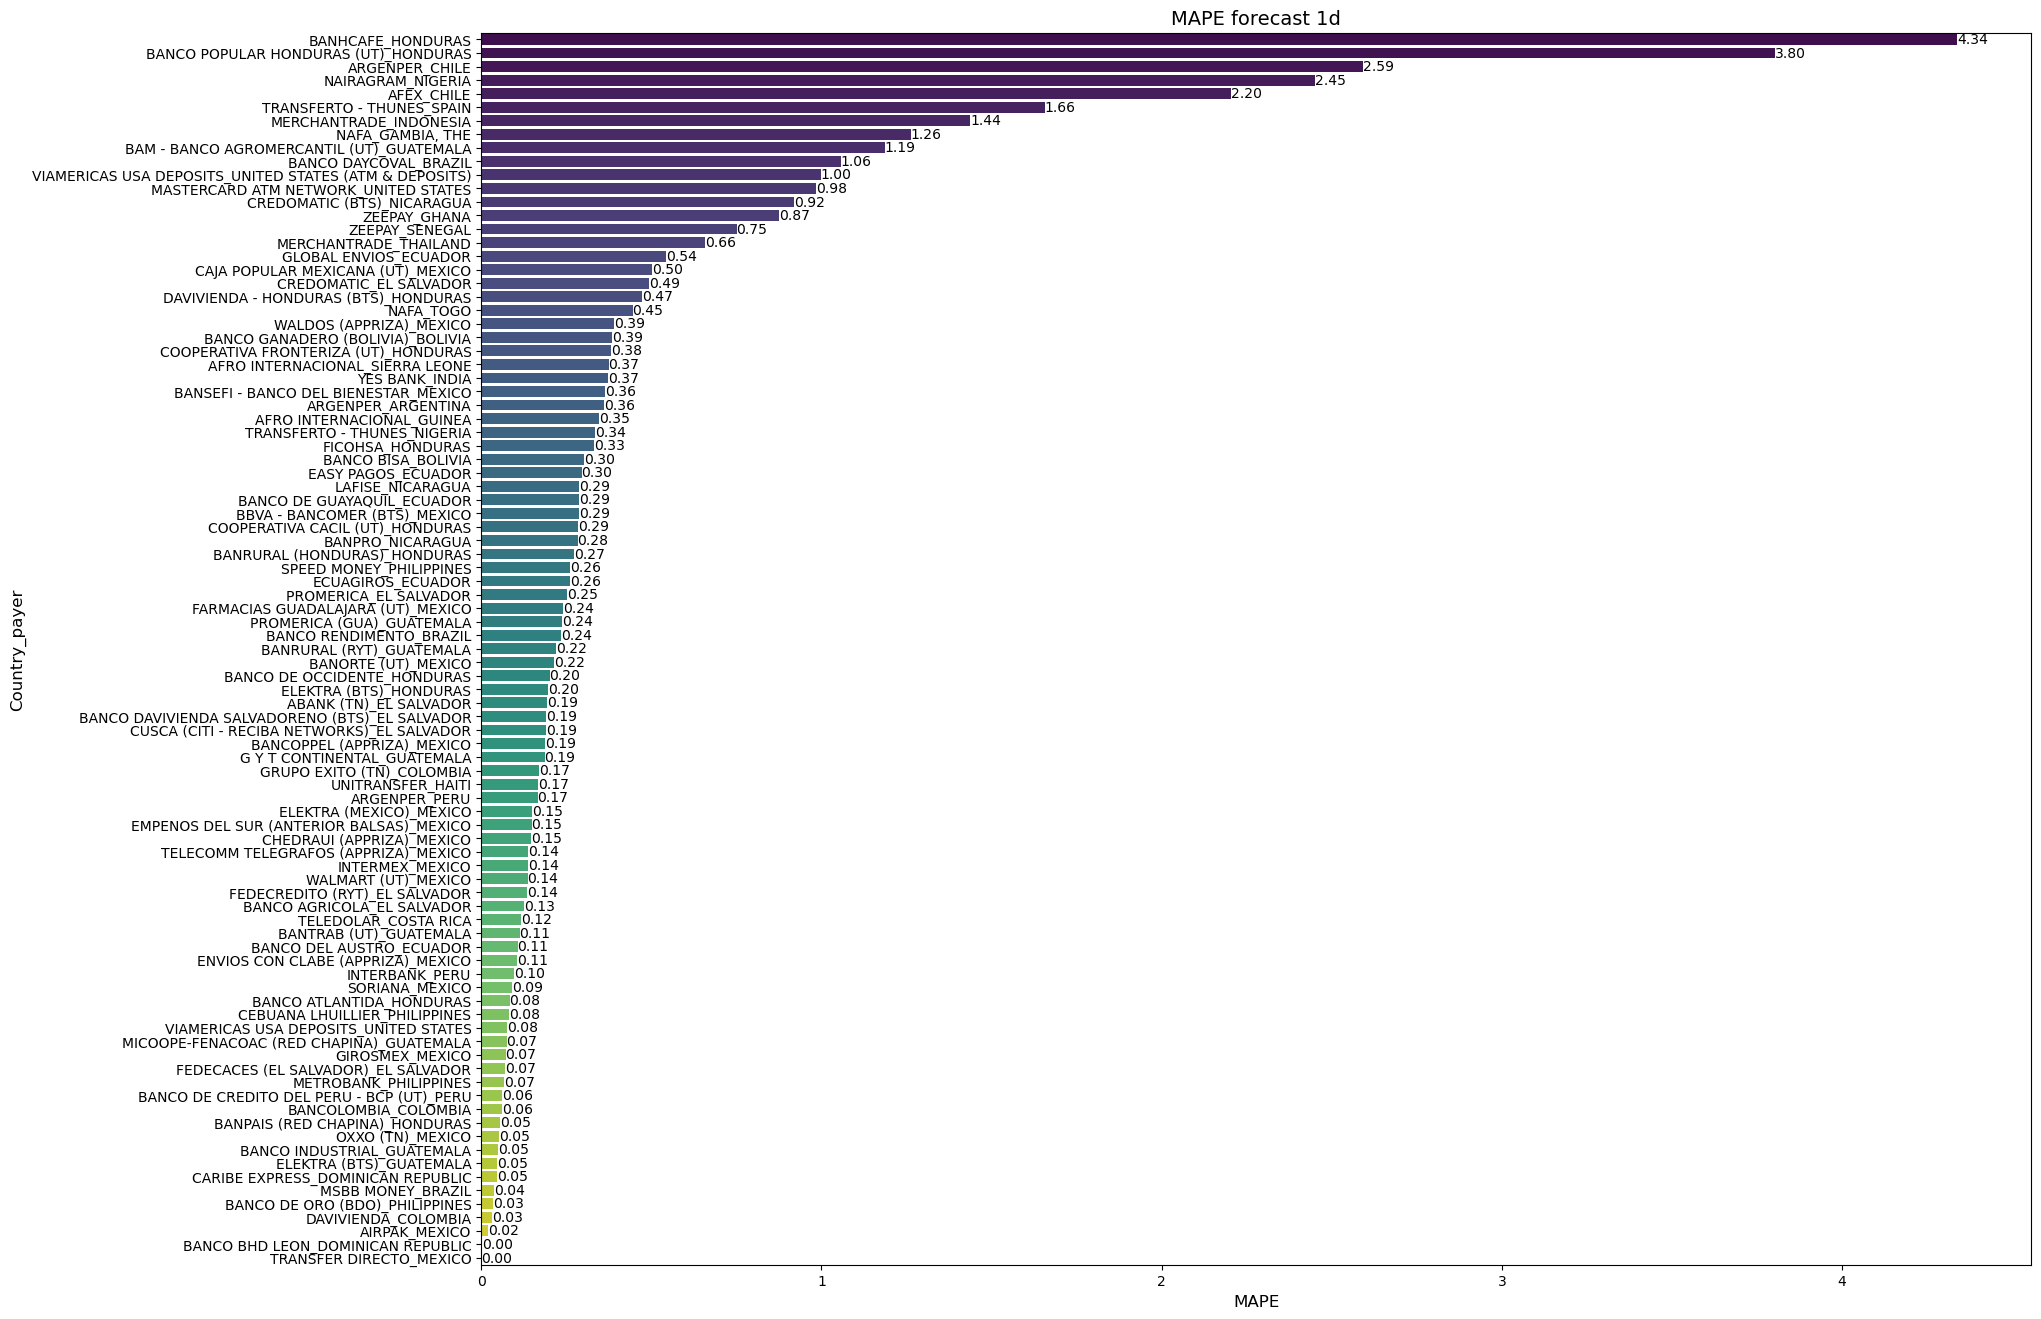

In [158]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

forecast_1d = forecast_1d.sort_values(by='pe', ascending=False)

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(20,16))
bar_plot = sns.barplot(x='pe', y='payer_country', data=forecast_1d, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('MAPE', fontsize=12)
plt.ylabel('Country_payer', fontsize=12)
plt.title('MAPE forecast 1d', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(forecast_1d['pe']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()

In [159]:
##FORECAST 1D MAPE PROMEDIO SIMPLE POR PAÍS##
forecast_1d_country = forecast_1d.groupby('country')['pe'].mean().reset_index()
forecast_1d_country.sort_values('pe')

,country,pe
6,DOMINICAN REPUBLIC,0.024065
4,COLOMBIA,0.087354
20,PERU,0.107941
21,PHILIPPINES,0.111110
5,COSTA RICA,0.118141
13,HAITI,0.168552
17,MEXICO,0.178370
8,EL SALVADOR,0.206880
11,GUATEMALA,0.264478
7,ECUADOR,0.299231


/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


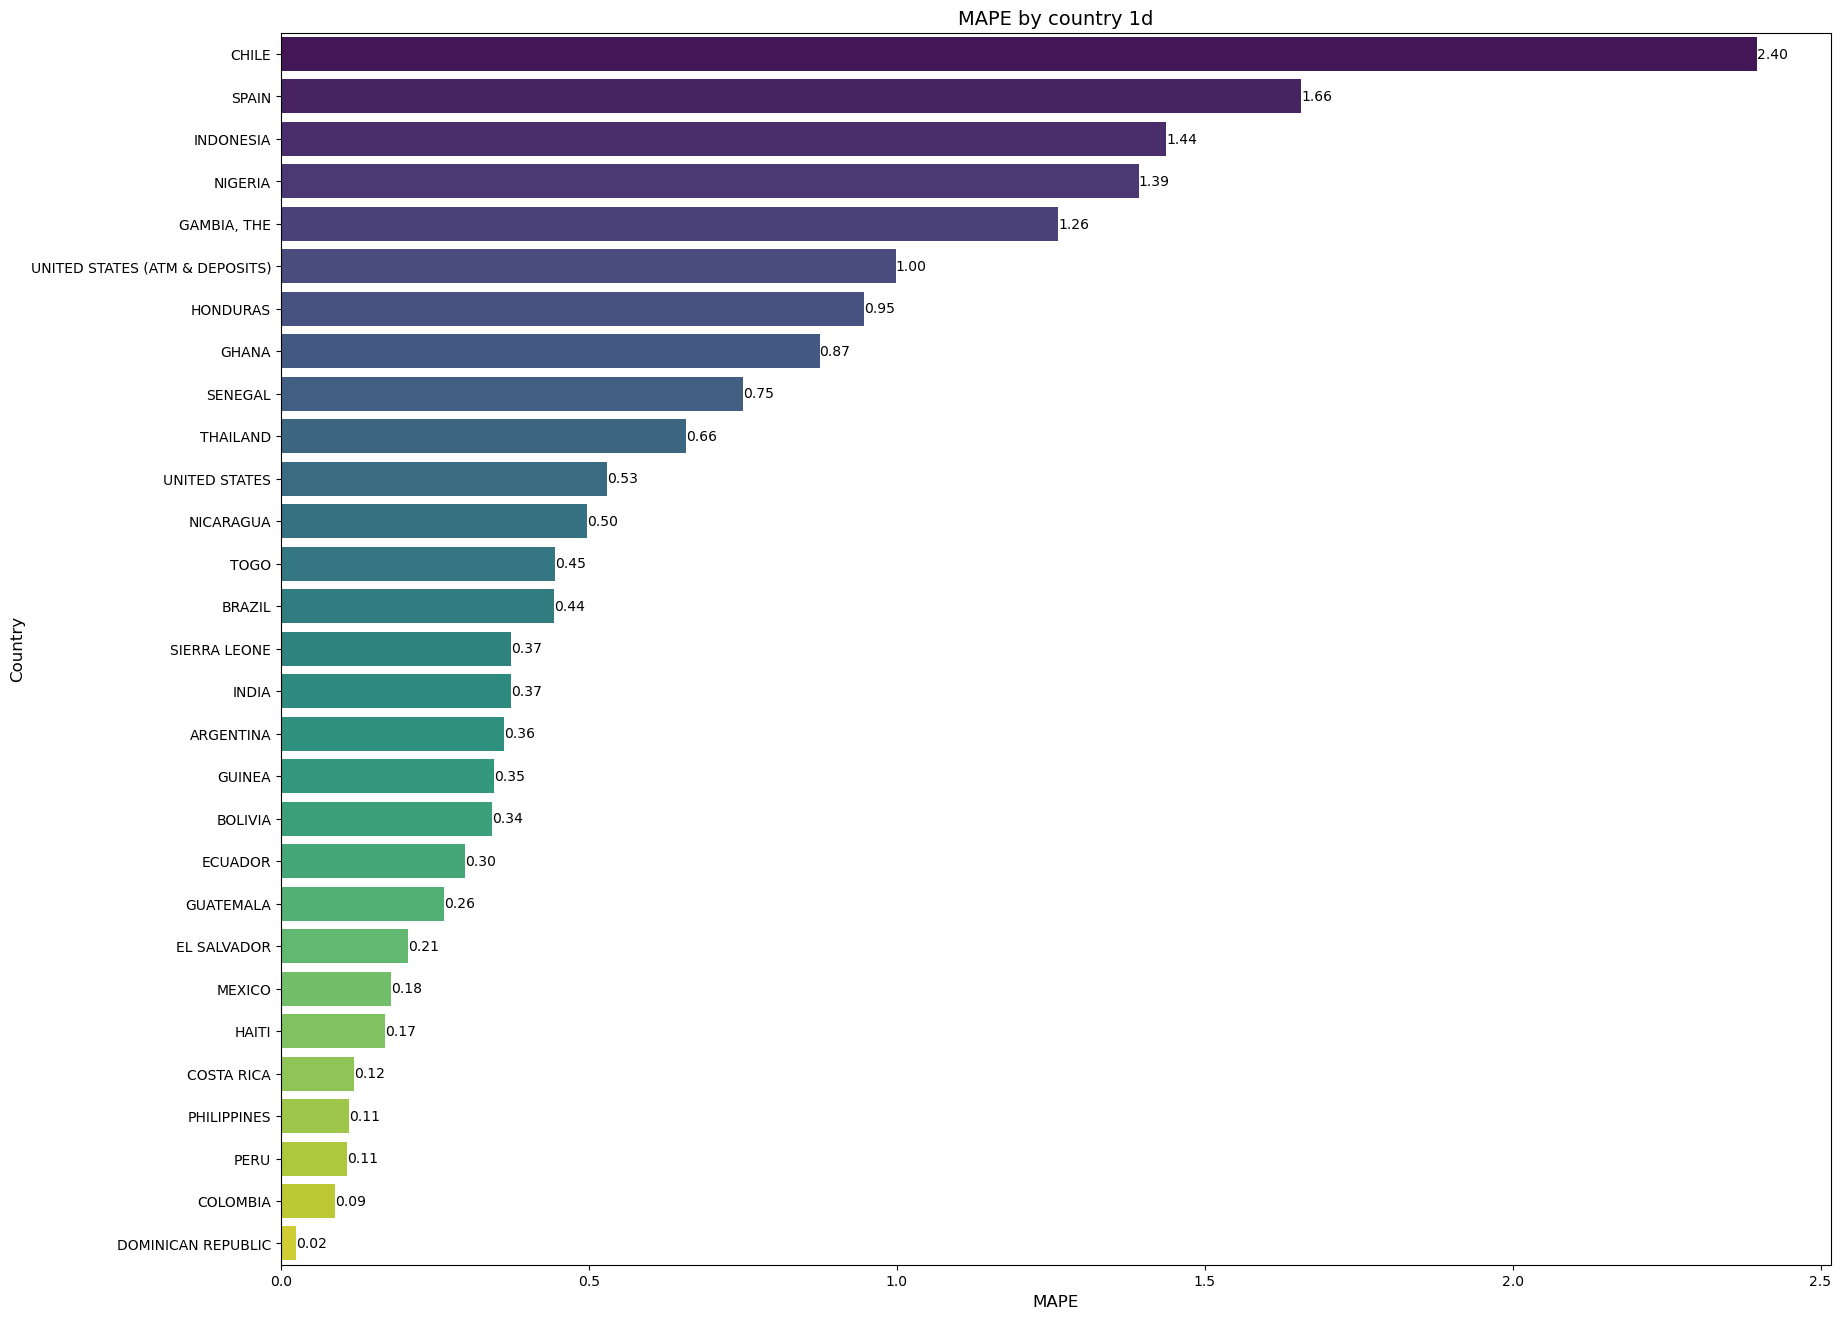

In [160]:
forecast_1d_country=forecast_1d_country.sort_values('pe', ascending=False)
# Crear el gráfico de barras con seaborn
plt.figure(figsize=(20,16))
bar_plot = sns.barplot(x='pe', y='country', data=forecast_1d_country, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('MAPE', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('MAPE by country 1d', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(forecast_1d_country['pe']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()

In [161]:
##WAPE A 1 DÍA GENERAL##
forecast_1d["ae"] = abs((forecast_1d.amount - forecast_1d['mean']))
print(forecast_1d.ae.sum() / forecast_1d.amount.sum())

0.15813598148313865


In [295]:
##WAPE POR PAÍSES##

In [162]:
wape_country_f1d = forecast_1d.groupby('country').apply(lambda x: (x['ae'].sum() / x['amount'].sum())).reset_index(name='wape')

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


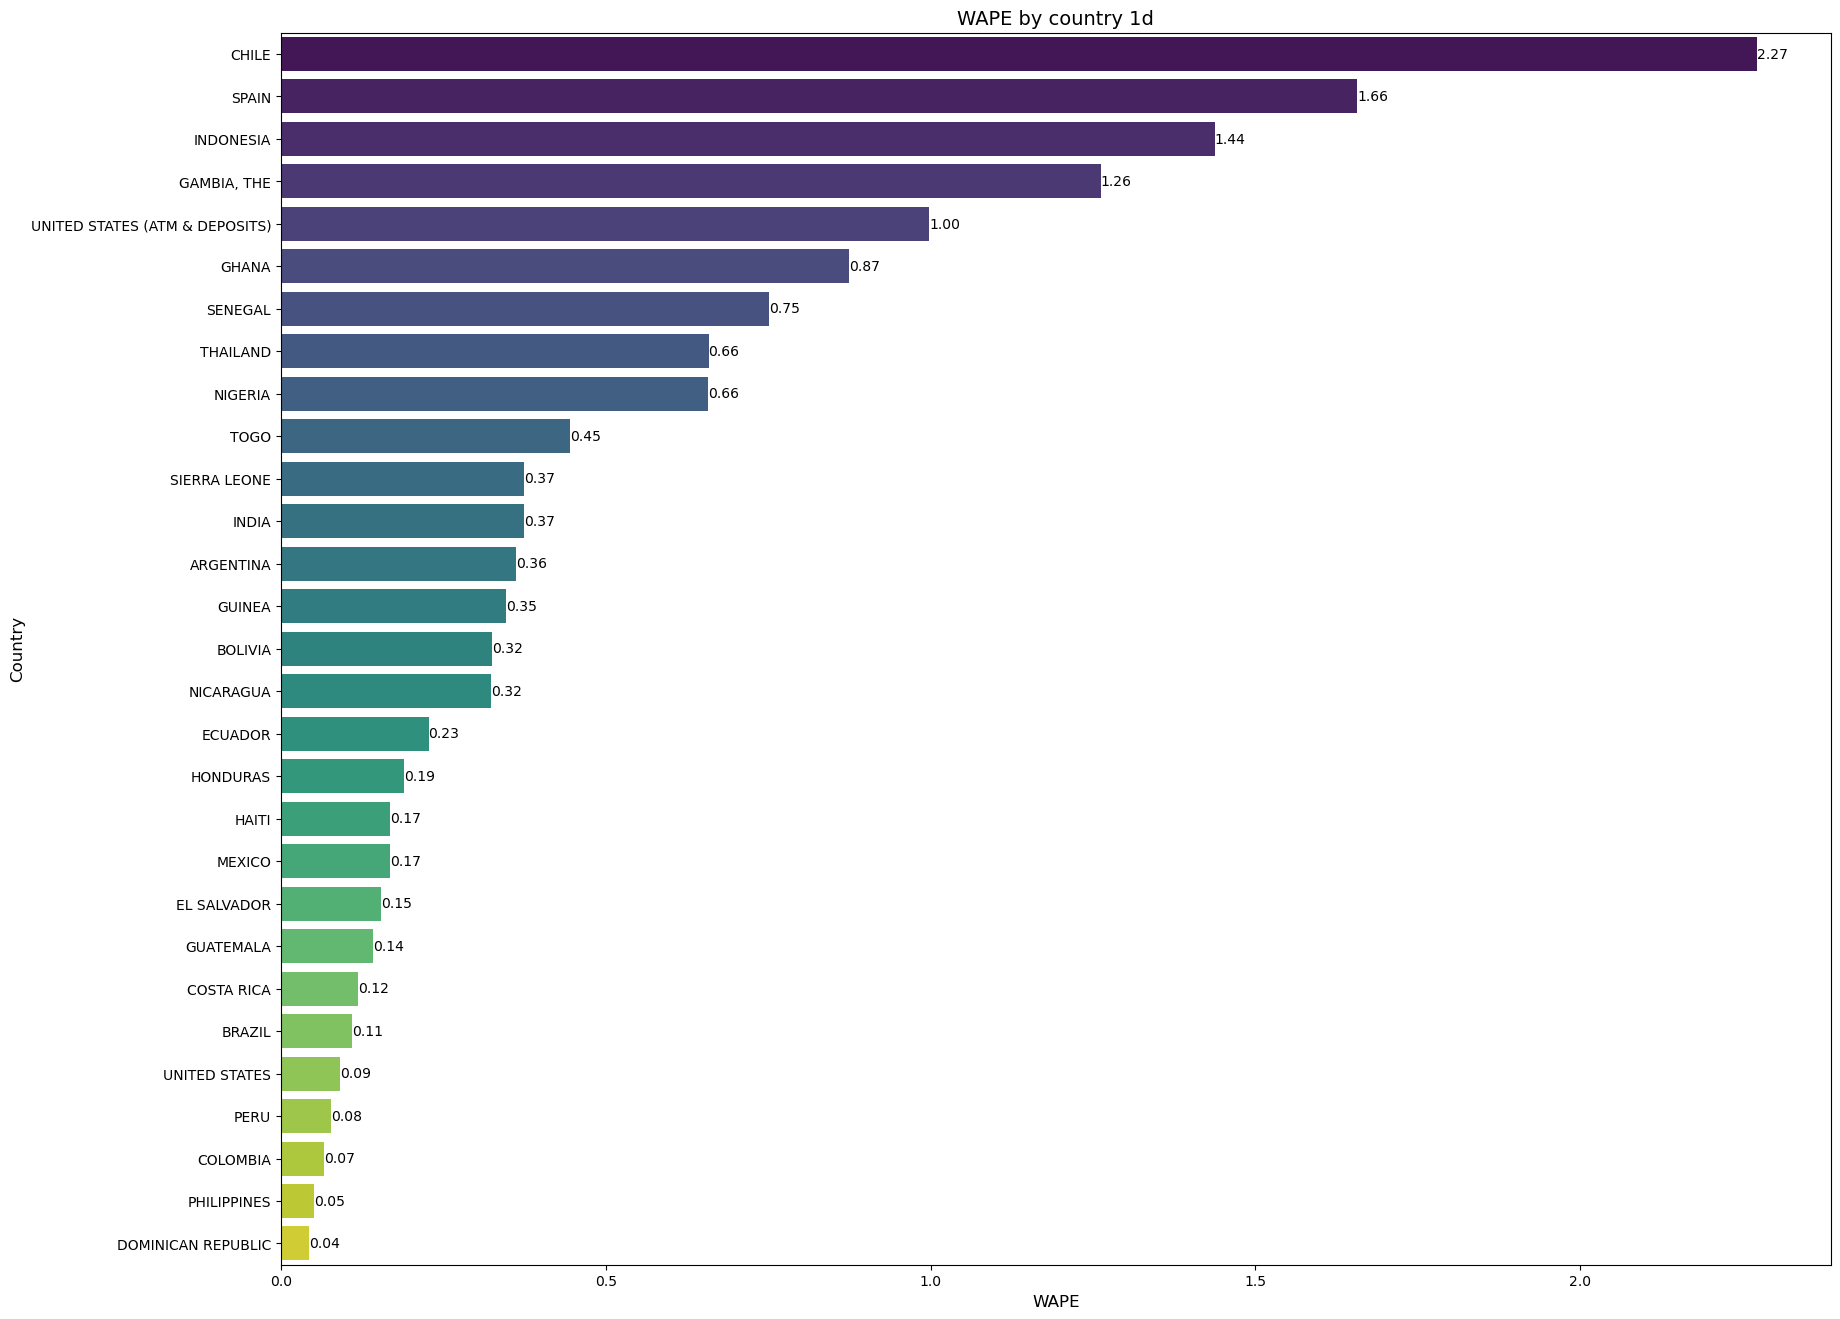

In [163]:
wape_country_f1d.sort_values('wape', inplace=True, ascending=False)

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(20,16))
bar_plot = sns.barplot(x='wape', y='country', data=wape_country_f1d, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('WAPE', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('WAPE by country 1d', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(wape_country_f1d['wape']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()


In [166]:
##MAPE A 3 DIAS##
###MAPE FORECAST A 3 DÍAS##
forecast_3d=df_forecast_final.loc[df_forecast_final.date<='2022-11-28']

In [167]:
forecast_3d.sort_values('amount', ascending=False).head(10)

,payer,country,date,amount,p10,p50,p90,mean,payer_country
582,ELEKTRA (MEXICO),MEXICO,2022-11-26,8178210.95,8.250253e+06,9.420317e+06,1.037329e+07,9.401130e+06,ELEKTRA (MEXICO)_MEXICO
89,ELEKTRA (MEXICO),MEXICO,2022-11-27,7433363.12,7.672080e+06,8.718699e+06,9.710198e+06,8.717377e+06,ELEKTRA (MEXICO)_MEXICO
714,ELEKTRA (MEXICO),MEXICO,2022-11-28,6803437.27,6.282353e+06,7.146394e+06,8.048824e+06,7.155116e+06,ELEKTRA (MEXICO)_MEXICO
101,BANCOPPEL (APPRIZA),MEXICO,2022-11-26,4701768.00,4.946270e+06,5.592504e+06,6.119088e+06,5.589479e+06,BANCOPPEL (APPRIZA)_MEXICO
238,BANCOPPEL (APPRIZA),MEXICO,2022-11-27,4252048.02,4.557570e+06,5.171891e+06,5.807206e+06,5.176740e+06,BANCOPPEL (APPRIZA)_MEXICO
82,BANRURAL (RYT),GUATEMALA,2022-11-27,4022342.64,4.257456e+06,5.023209e+06,5.609409e+06,5.023209e+06,BANRURAL (RYT)_GUATEMALA
733,BANCOPPEL (APPRIZA),MEXICO,2022-11-28,3768704.82,3.488758e+06,4.062770e+06,4.661427e+06,4.064734e+06,BANCOPPEL (APPRIZA)_MEXICO
687,BANRURAL (RYT),GUATEMALA,2022-11-26,3390630.21,3.624764e+06,4.135429e+06,4.593710e+06,4.135429e+06,BANRURAL (RYT)_GUATEMALA
162,BANCO INDUSTRIAL,GUATEMALA,2022-11-27,3254725.63,3.315295e+06,3.820230e+06,4.229897e+06,3.815602e+06,BANCO INDUSTRIAL_GUATEMALA
197,BANCO INDUSTRIAL,GUATEMALA,2022-11-26,2954785.67,2.730129e+06,3.110228e+06,3.435294e+06,3.101904e+06,BANCO INDUSTRIAL_GUATEMALA


In [168]:
forecast_3d.date.min(),forecast_3d.date.max()

(Timestamp('2022-11-26 00:00:00'), Timestamp('2022-11-28 00:00:00'))

In [169]:
##MAPE PROMEDIO A 3 D (para los que tienen MAPE definido)
forecast_3d["pe"] = abs((forecast_3d.amount - forecast_3d['mean']) / forecast_3d.amount)
forecast_3d.pe.mean()

/tmp/ipykernel_899/383919511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_3d["pe"] = abs((forecast_3d.amount - forecast_3d['mean']) / forecast_3d.amount)


0.47366357405975706

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


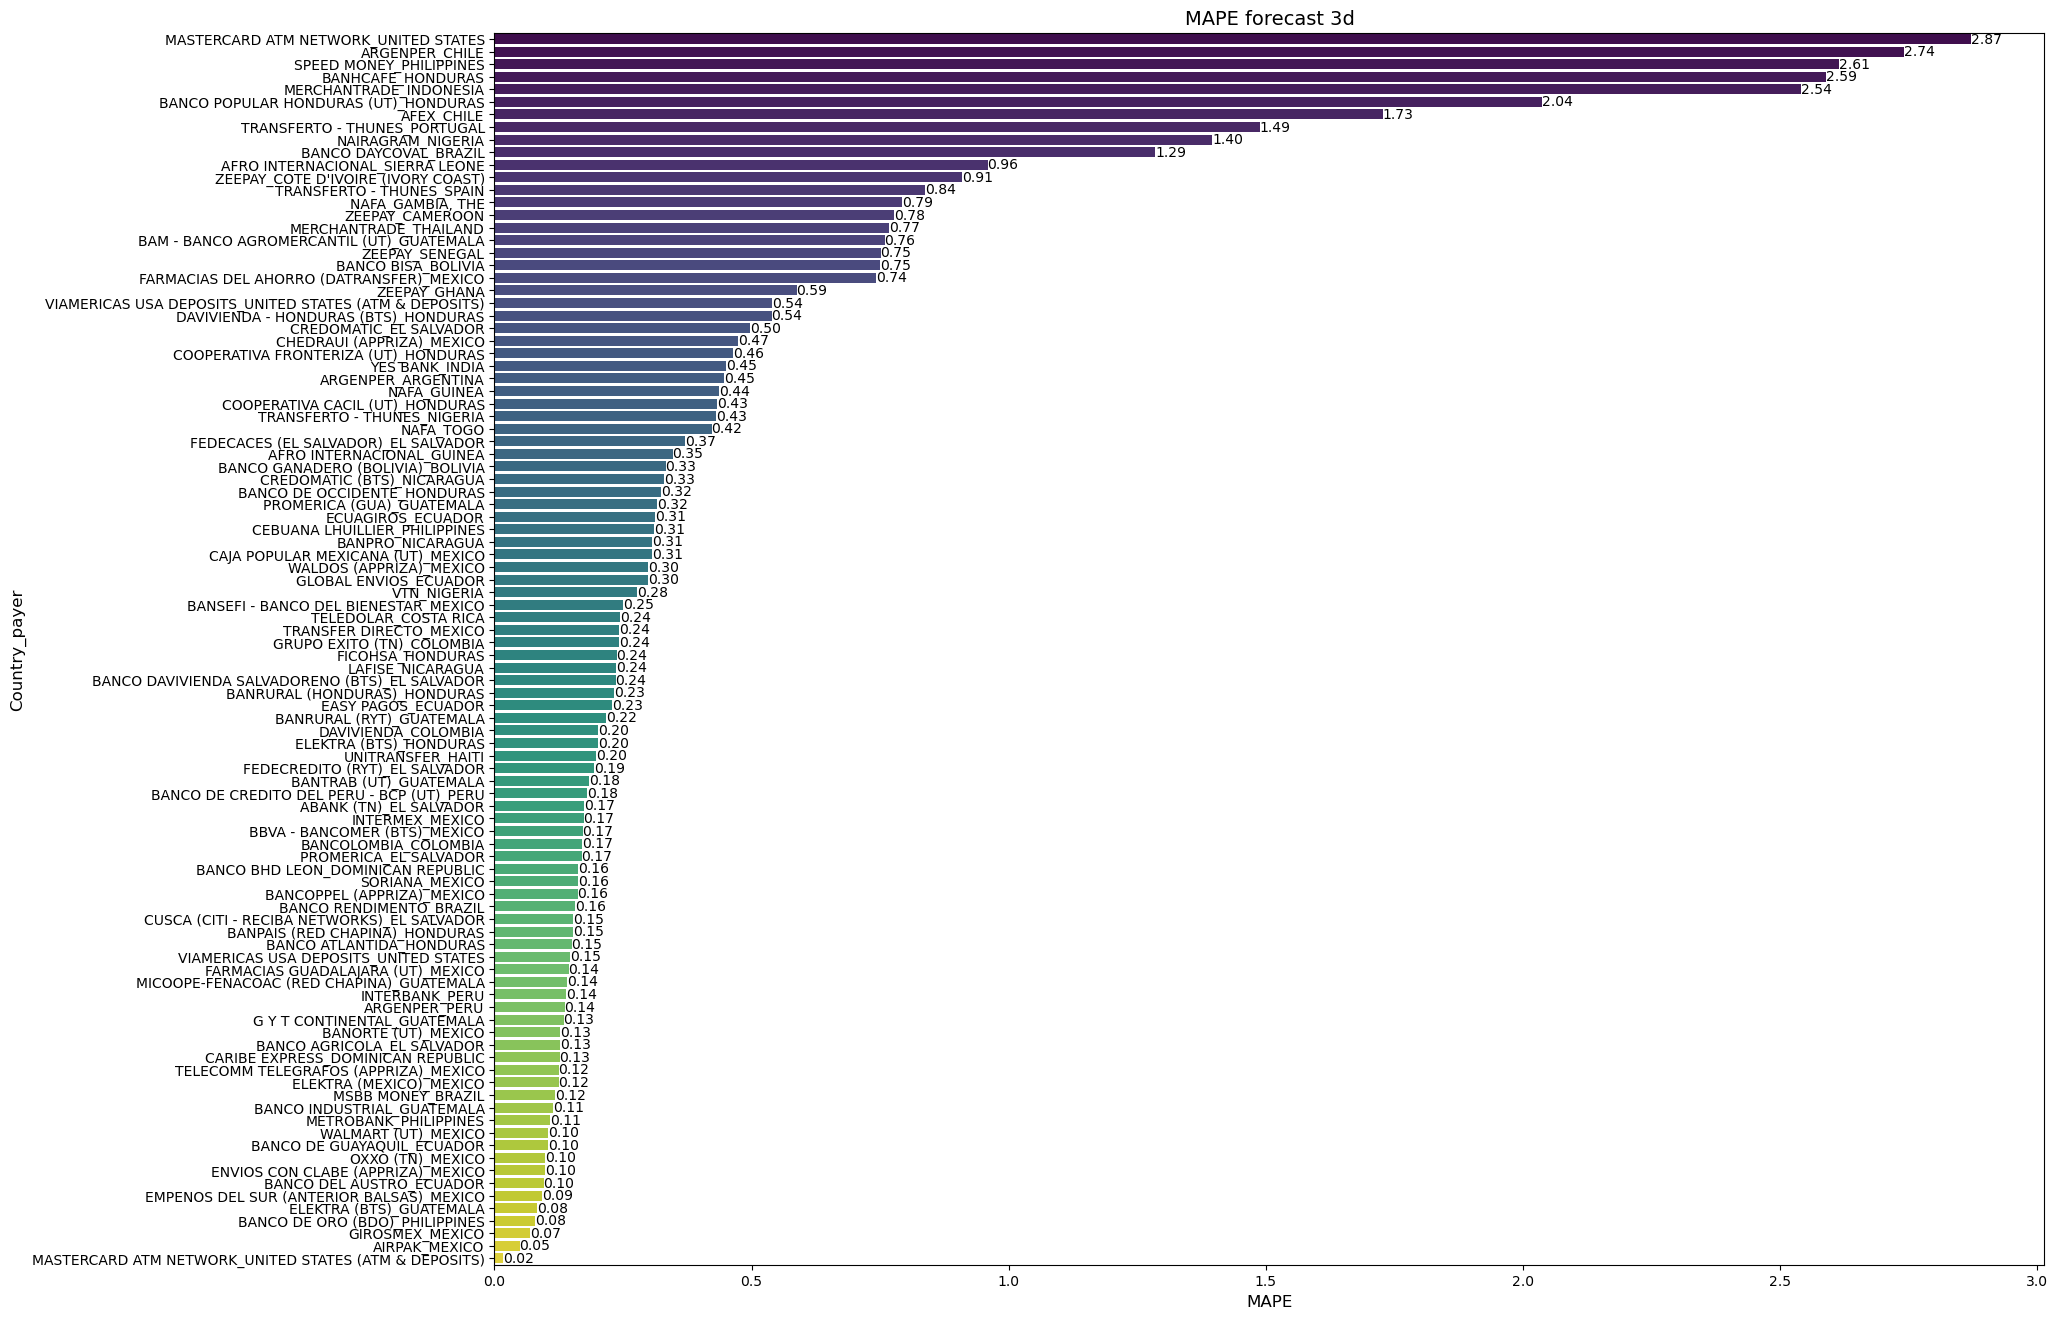

In [170]:
# Agrupar por 'payer_country' y calcular la suma de 'pe', luego ordenar por 'pe' de forma descendente
forecast_3d_payer_country = forecast_3d.groupby('payer_country')['pe'].mean().reset_index().sort_values(by='pe', ascending=False)

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(20,16))
bar_plot = sns.barplot(x='pe', y='payer_country', data=forecast_3d_payer_country, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('MAPE', fontsize=12)
plt.ylabel('Country_payer', fontsize=12)
plt.title('MAPE forecast 3d', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(forecast_3d_payer_country['pe']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()

In [171]:
##FORECAST 3DIAS  MAPE PROMEDIO SIMPLE POR PAÍS##
forecast_3d_country = forecast_3d.groupby('country')['pe'].mean().reset_index()
forecast_3d_country=forecast_3d_country.sort_values('pe', ascending=False)

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


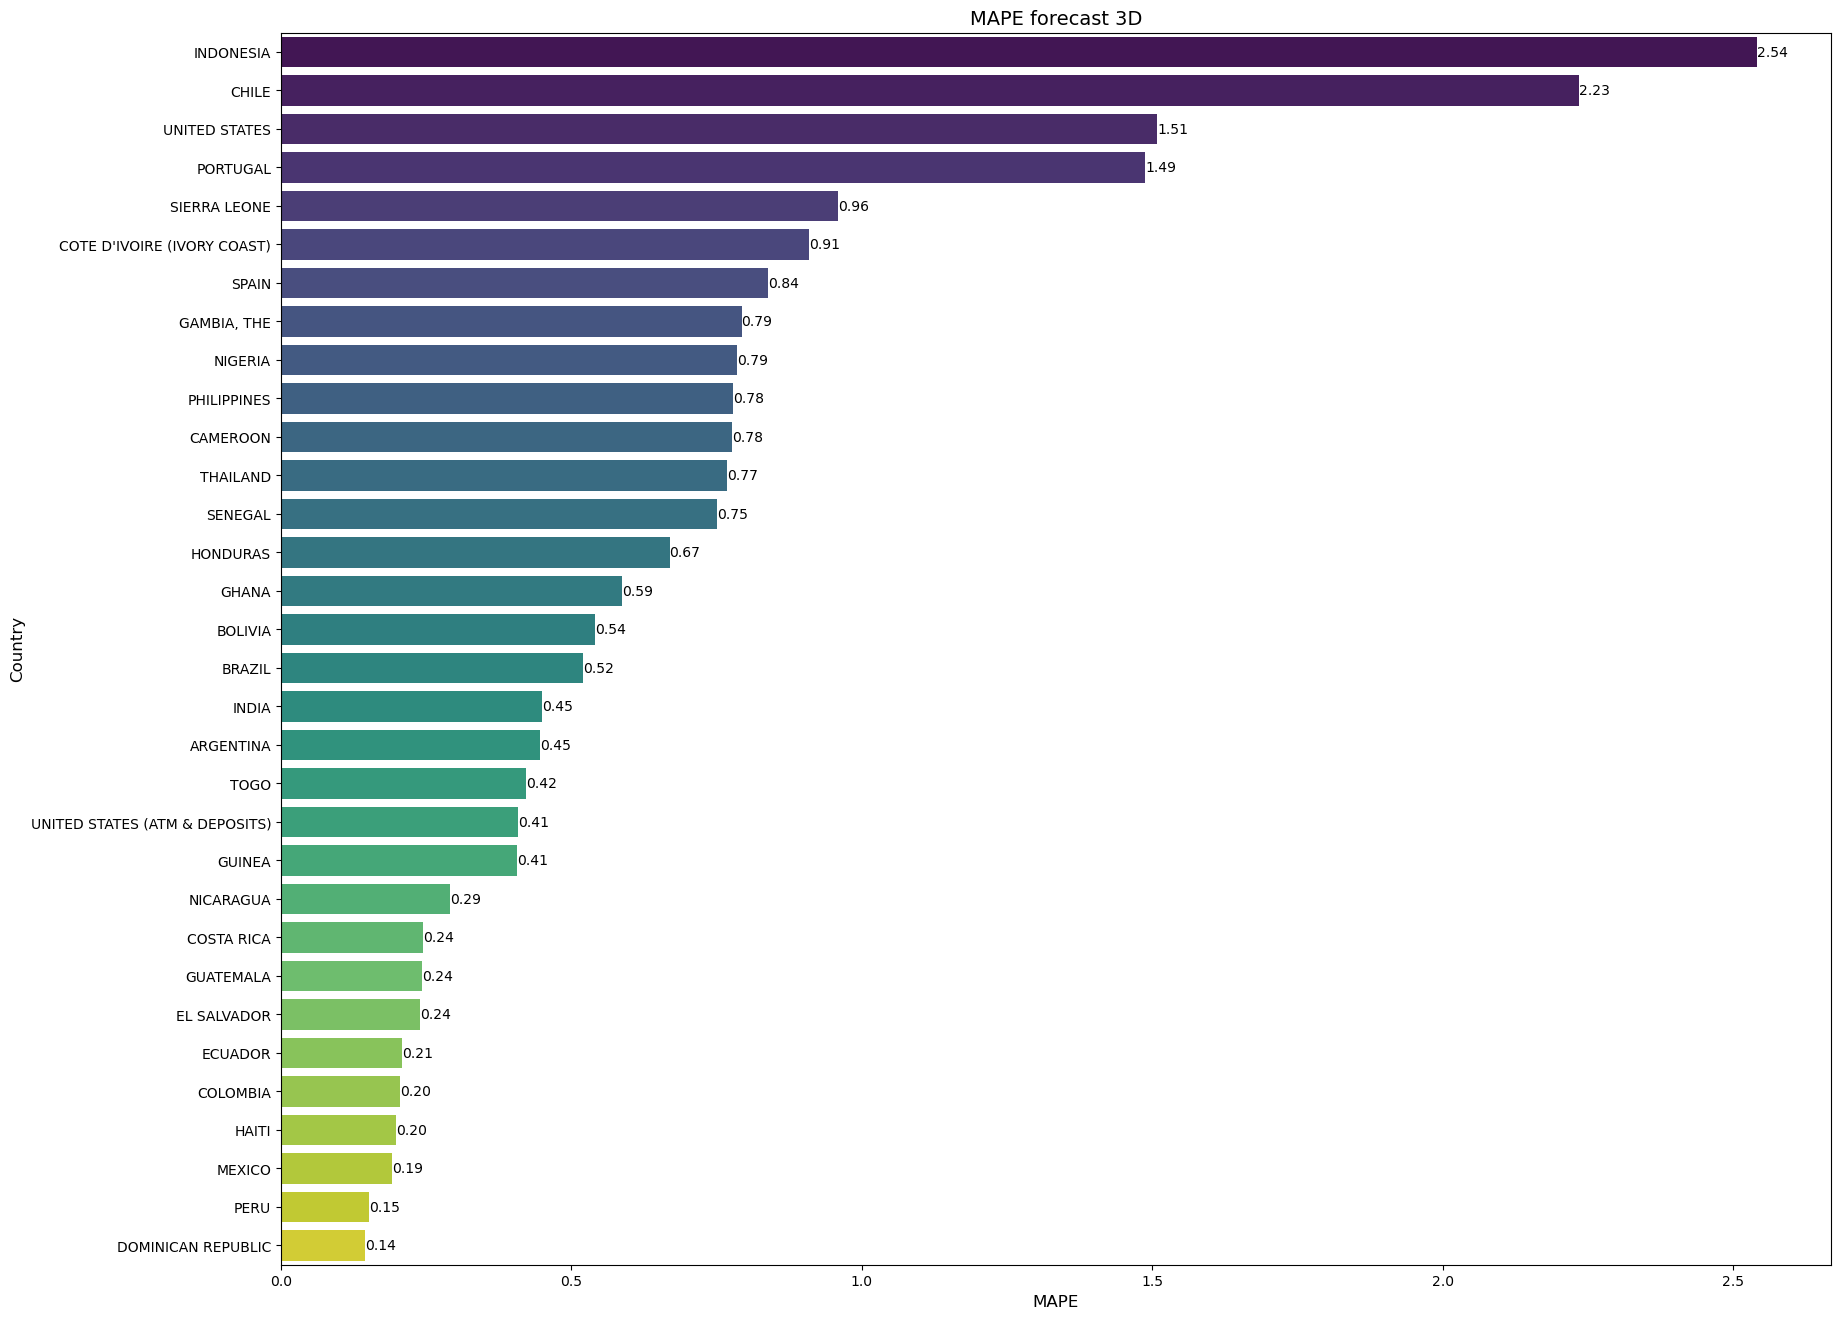

In [172]:
# Crear el gráfico de barras con seaborn
plt.figure(figsize=(20,16))
bar_plot = sns.barplot(x='pe', y='country', data=forecast_3d_country, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('MAPE', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('MAPE forecast 3D', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(forecast_3d_country['pe']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()

In [173]:
##WAPE A 3 DÍAS GENERAL##
forecast_3d["ae"] = abs((forecast_3d.amount - forecast_3d['mean']))
print(forecast_3d.ae.sum() / forecast_3d.amount.sum())

0.15925860725989963


/tmp/ipykernel_899/4007322800.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_3d["ae"] = abs((forecast_3d.amount - forecast_3d['mean']))


In [174]:
##WAPE POR PAÍSES 3d##

In [175]:
wape_country_f3d = forecast_3d.groupby('country').apply(lambda x: (x['ae'].sum() / x['amount'].sum())).reset_index(name='wape')

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


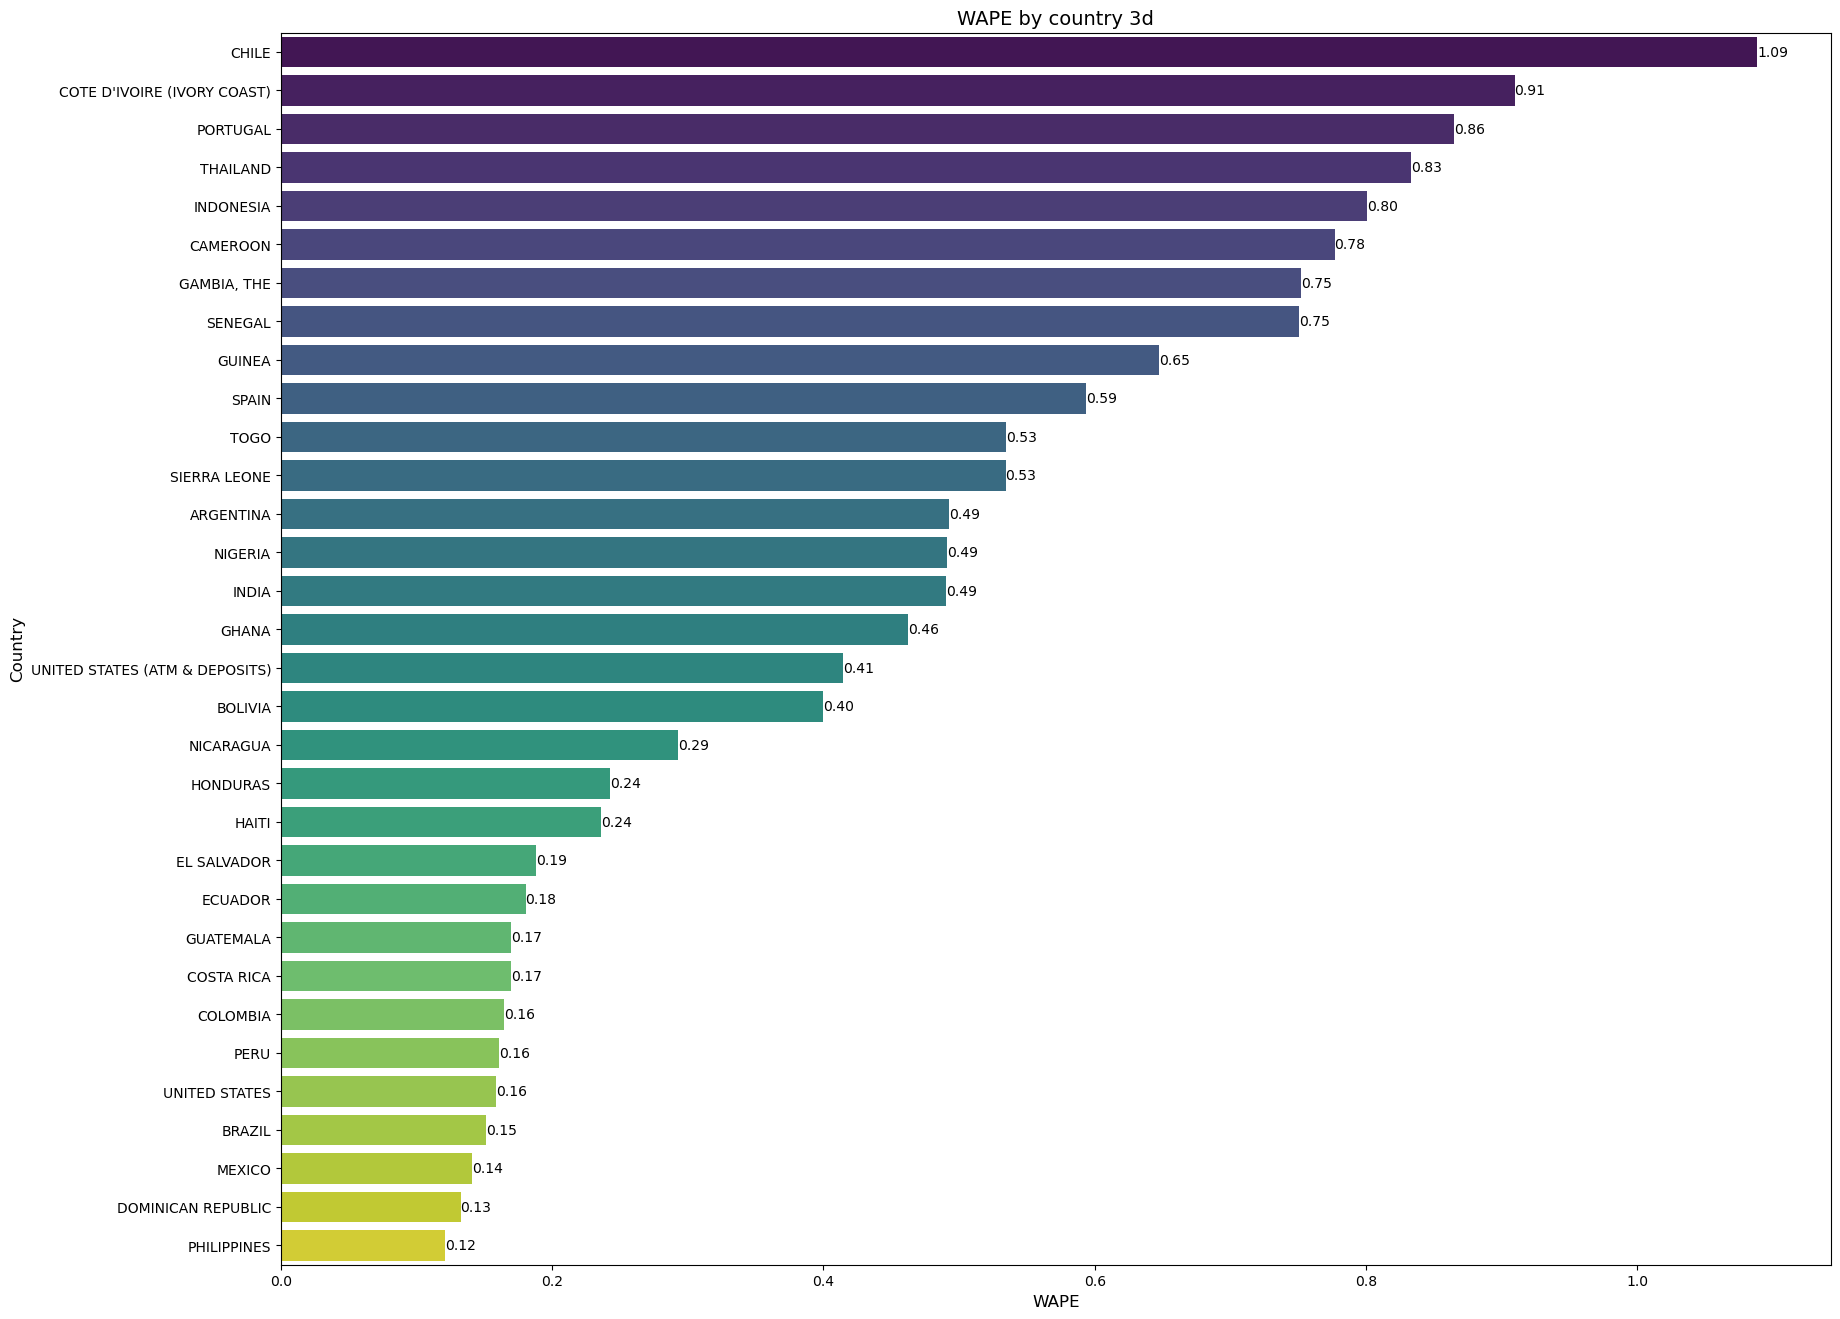

In [176]:
wape_country_f3d.sort_values('wape', inplace=True, ascending=False)

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(20,16))
bar_plot = sns.barplot(x='wape', y='country', data=wape_country_f3d, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('WAPE', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('WAPE by country 3d', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(wape_country_f3d['wape']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()

In [177]:
##MAPE A 7 DIAS##
###MAPE FORECAST 7 DÍAS##
forecast_7d=df_forecast_final

In [178]:
forecast_7d.shape

(653, 9)

In [179]:
forecast_7d["pe"] = abs((forecast_7d.amount - forecast_7d['mean']) / forecast_7d.amount)

In [180]:
forecast_7d.date.min(),forecast_7d.date.max()

(Timestamp('2022-11-26 00:00:00'), Timestamp('2022-12-02 00:00:00'))

In [181]:
##MAPE PROMEDIO A 7 D (para los que tienen MAPE definido)
forecast_7d["pe"] = abs((forecast_7d.amount - forecast_7d['mean']) / forecast_7d.amount)
forecast_7d.pe.mean()

0.461609175799776

In [314]:
##MAPE PROMEDIO A 7 DIAS POR PAYER

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


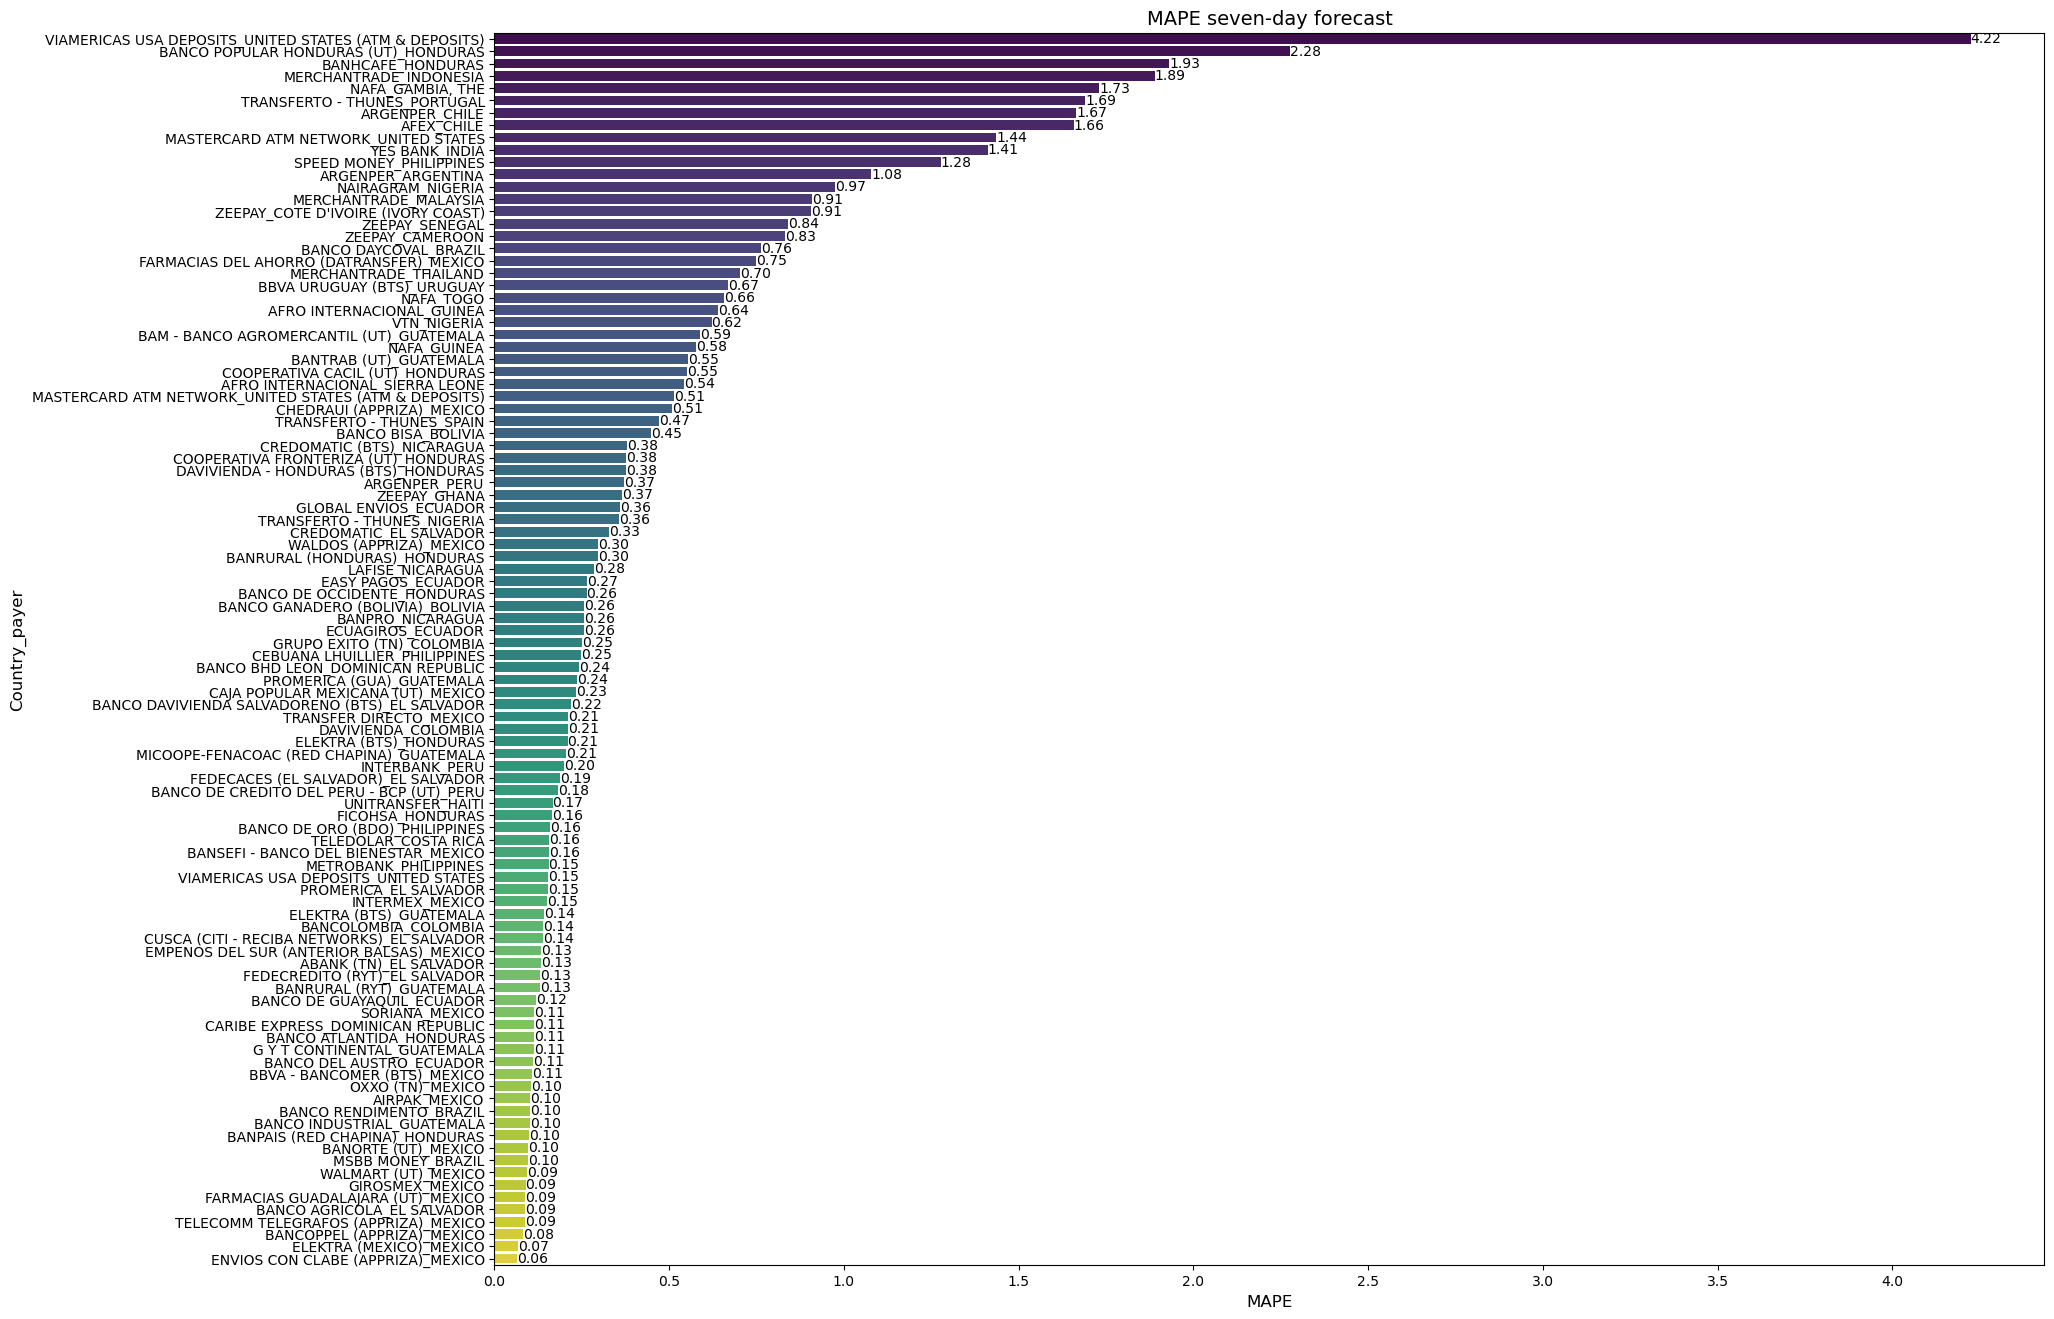

In [182]:
# Agrupar por 'payer_country' y calcular la suma de 'pe', luego ordenar por 'pe' de forma descendente
forecast_7d_payer_country = forecast_7d.groupby('payer_country')['pe'].mean().reset_index().sort_values(by='pe', ascending=False)

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(20,16))
bar_plot = sns.barplot(x='pe', y='payer_country', data=forecast_7d_payer_country, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('MAPE', fontsize=12)
plt.ylabel('Country_payer', fontsize=12)
plt.title('MAPE seven-day forecast', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(forecast_7d_payer_country['pe']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()

In [183]:
##FORECAST 7DIAS  MAPE PROMEDIO SIMPLE POR PAÍS##
forecast_7d_country = forecast_7d.groupby('country')['pe'].mean().reset_index()
forecast_7d_country=forecast_7d_country.sort_values('pe', ascending=False)

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


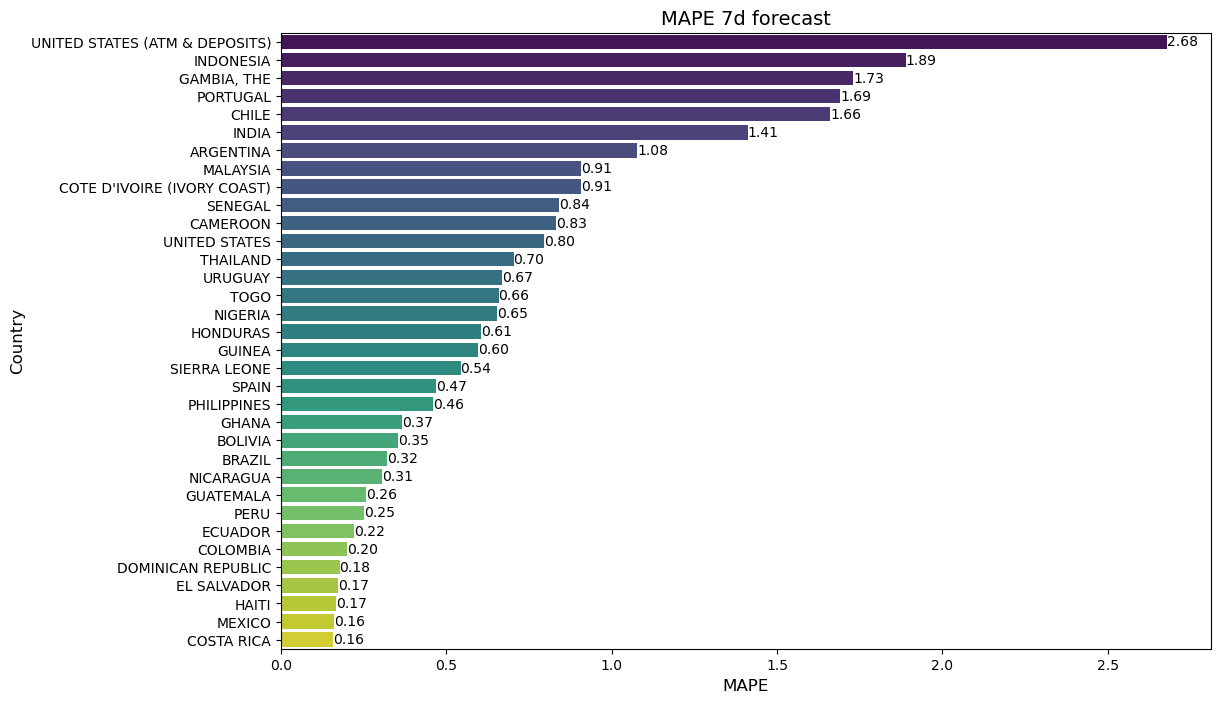

In [184]:
# Crear el gráfico de barras con seaborn
plt.figure(figsize=(12,8))
bar_plot = sns.barplot(x='pe', y='country', data=forecast_7d_country, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('MAPE', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('MAPE 7d forecast', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(forecast_7d_country['pe']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()

In [185]:
##WAPE A 7 DIAS GENERAL##
forecast_7d=df_forecast_final
forecast_7d["ae"] = abs((forecast_7d.amount - forecast_7d['mean']))
print(forecast_7d.ae.sum() / forecast_7d.amount.sum())

0.11345721605378337


In [ ]:
#WAPE POR PAISES A 7 DIAS

In [187]:
wape_country_f7d = forecast_7d.groupby('country').apply(lambda x: (x['ae'].sum() / x['amount'].sum())).reset_index(name='wape')

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


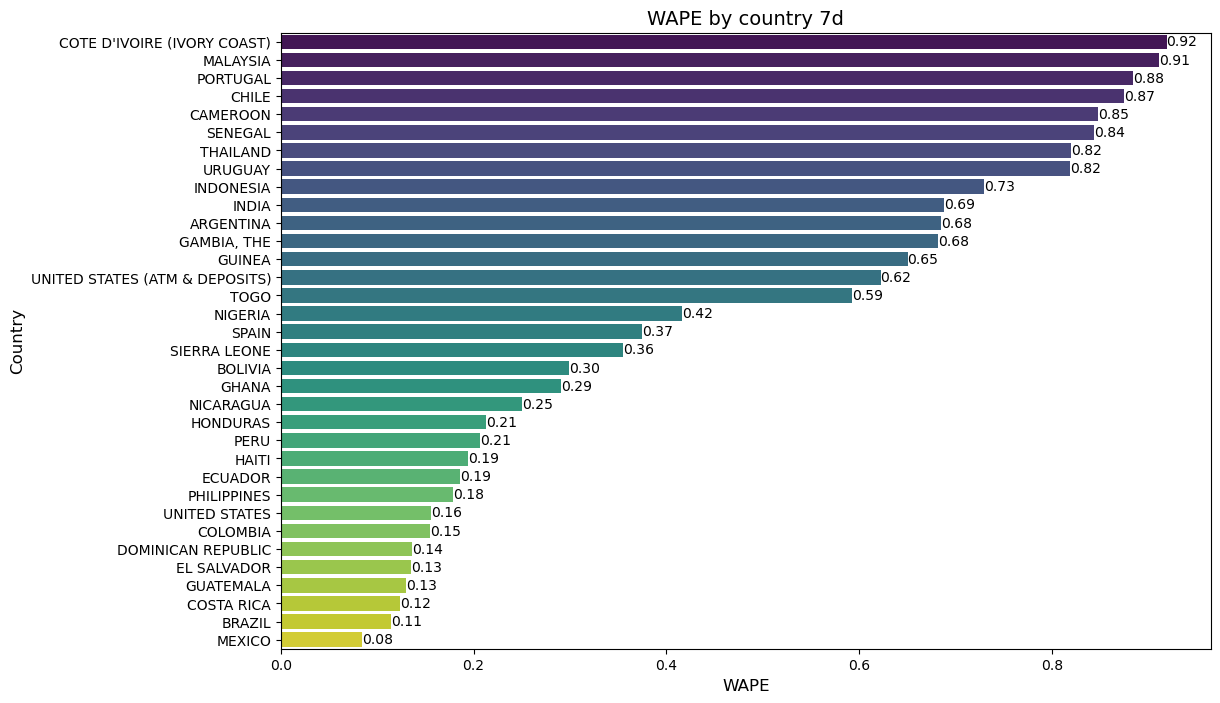

In [188]:
wape_country_f7d.sort_values('wape', inplace=True, ascending=False)

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(12,8))
bar_plot = sns.barplot(x='wape', y='country', data=wape_country_f7d, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('WAPE', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('WAPE by country 7d', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(wape_country_f7d['wape']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()
